# INFOTECH PRODIGY - TASK-04

### Analyse and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific or brands.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols=['ID', 'Entity', 'Sentiment', 'Text']
train = pd.read_csv(r"C:\Users\HP\Documents\Datasets\twitter_training.csv", names= cols)
cols2= ['ID', 'Entity', 'Sentiment', 'Text']
train2 = pd.read_csv(r"C:\Users\HP\Documents\Datasets\twitter_validation.csv", names= cols2)

In [5]:
print(train,train2)

         ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just 

In [7]:
print(train.info(),train2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Entity     1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None None


In [9]:
train.describe(include=['int','float','object'])

,ID,Entity,Sentiment,Text
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [11]:
train2.describe(include=['int','float','object'])

,ID,Entity,Sentiment,Text
count,1000.000000,1000,1000,1000
unique,NaN,32,4,999
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6432.088000,NaN,NaN,NaN
std,3728.310569,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3247.750000,NaN,NaN,NaN
50%,6550.000000,NaN,NaN,NaN
75%,9661.750000,NaN,NaN,NaN


In [13]:
train.isnull().sum()

ID             0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [15]:
train.dropna(axis= 0, inplace= True)

In [17]:
train.isnull().sum()

ID           0
Entity       0
Sentiment    0
Text         0
dtype: int64

In [19]:
train.duplicated().sum()

2340

In [21]:
train.drop_duplicates(inplace=True)

In [23]:
train.duplicated().sum()

0

In [25]:
train2.isnull().sum()

ID           0
Entity       0
Sentiment    0
Text         0
dtype: int64

In [27]:
train2.duplicated().sum()

0

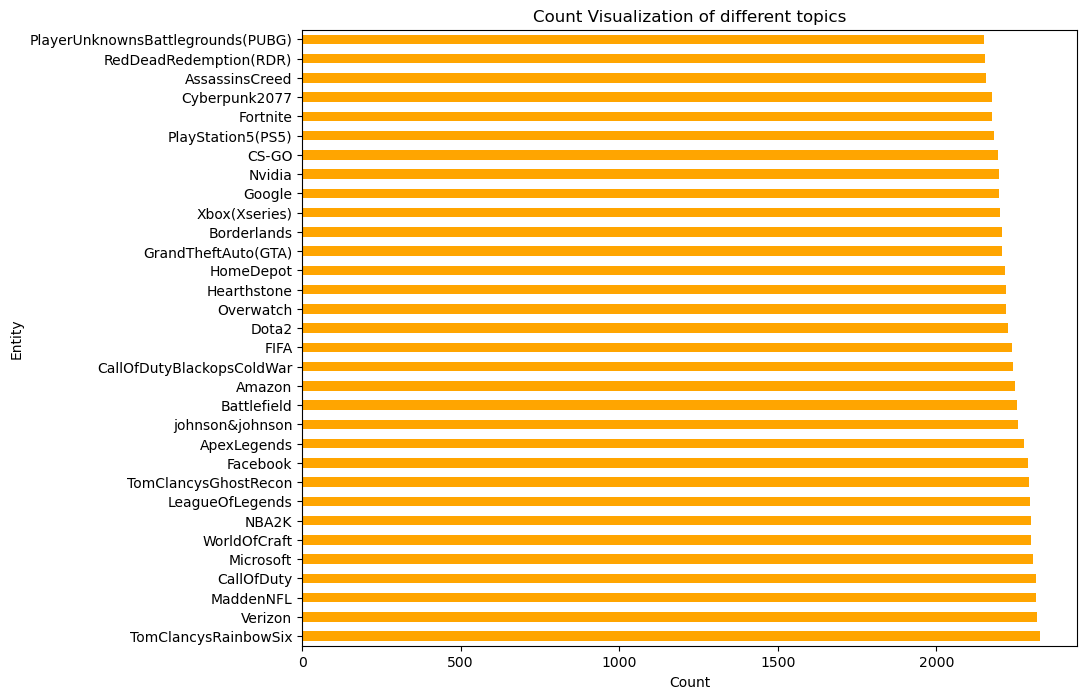

In [29]:
plt.figure(figsize= (10,8))
train['Entity'].value_counts().plot(kind='barh', color= 'orange')
plt.title('Count Visualization of different topics')
plt.xlabel("Count")
plt.show()

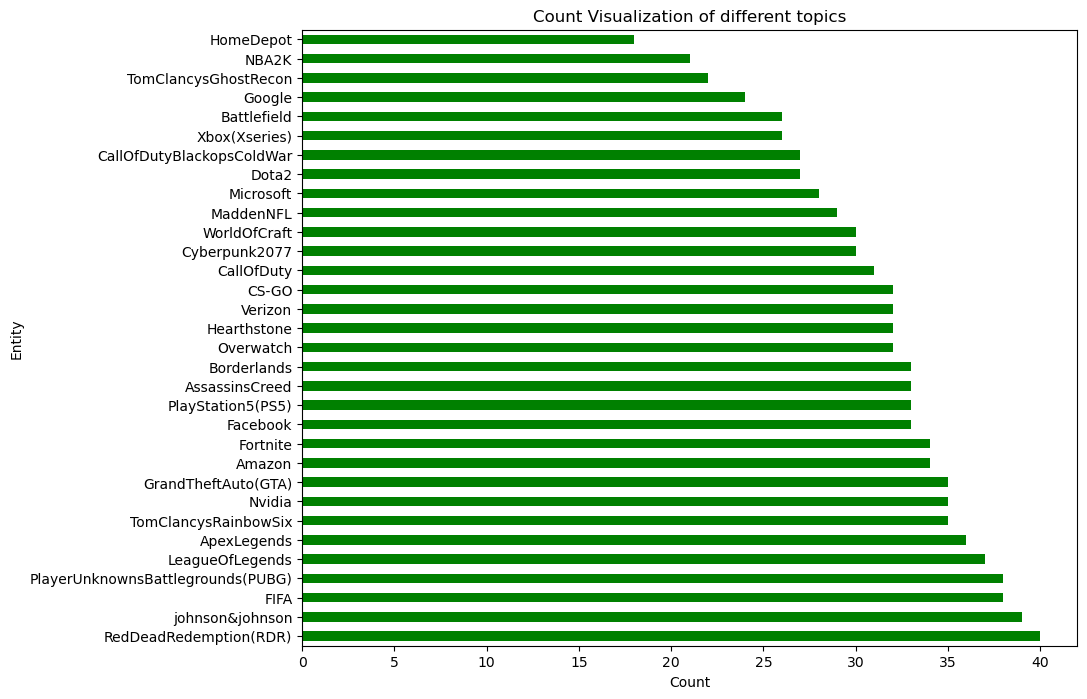

In [30]:
plt.figure(figsize= (10,8))
train2['Entity'].value_counts().plot(kind='barh', color= 'green')
plt.title('Count Visualization of different topics')
plt.xlabel("Count")
plt.show()

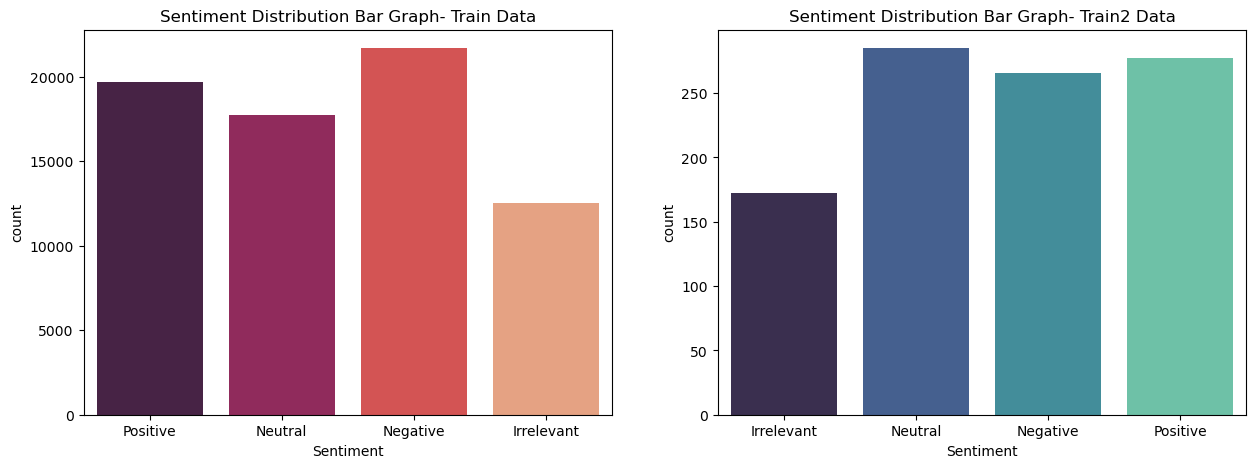

<Figure size 640x480 with 0 Axes>

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'Sentiment', data= train, palette= 'rocket', ax= ax[0])
ax[0].set_title('Sentiment Distribution Bar Graph- Train Data')

sns.countplot(x = 'Sentiment', data= train2, palette= 'mako', ax= ax[1])
ax[1].set_title('Sentiment Distribution Bar Graph- Train2 Data')
plt.show()
plt.tight_layout()

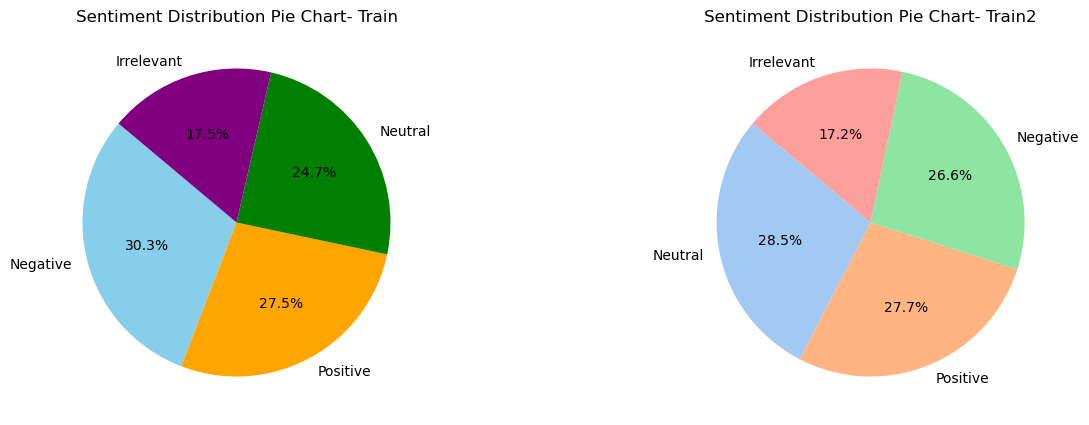

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()
ax[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'purple'])
ax[0].set_title('Sentiment Distribution Pie Chart- Train')

sentiment_counts2 = train2['Sentiment'].value_counts()
ax[1].pie(sentiment_counts2, labels=sentiment_counts2.index, autopct="%1.1f%%", startangle=140, colors= sns.color_palette("pastel"))
ax[1].set_title('Sentiment Distribution Pie Chart- Train2')
plt.show()

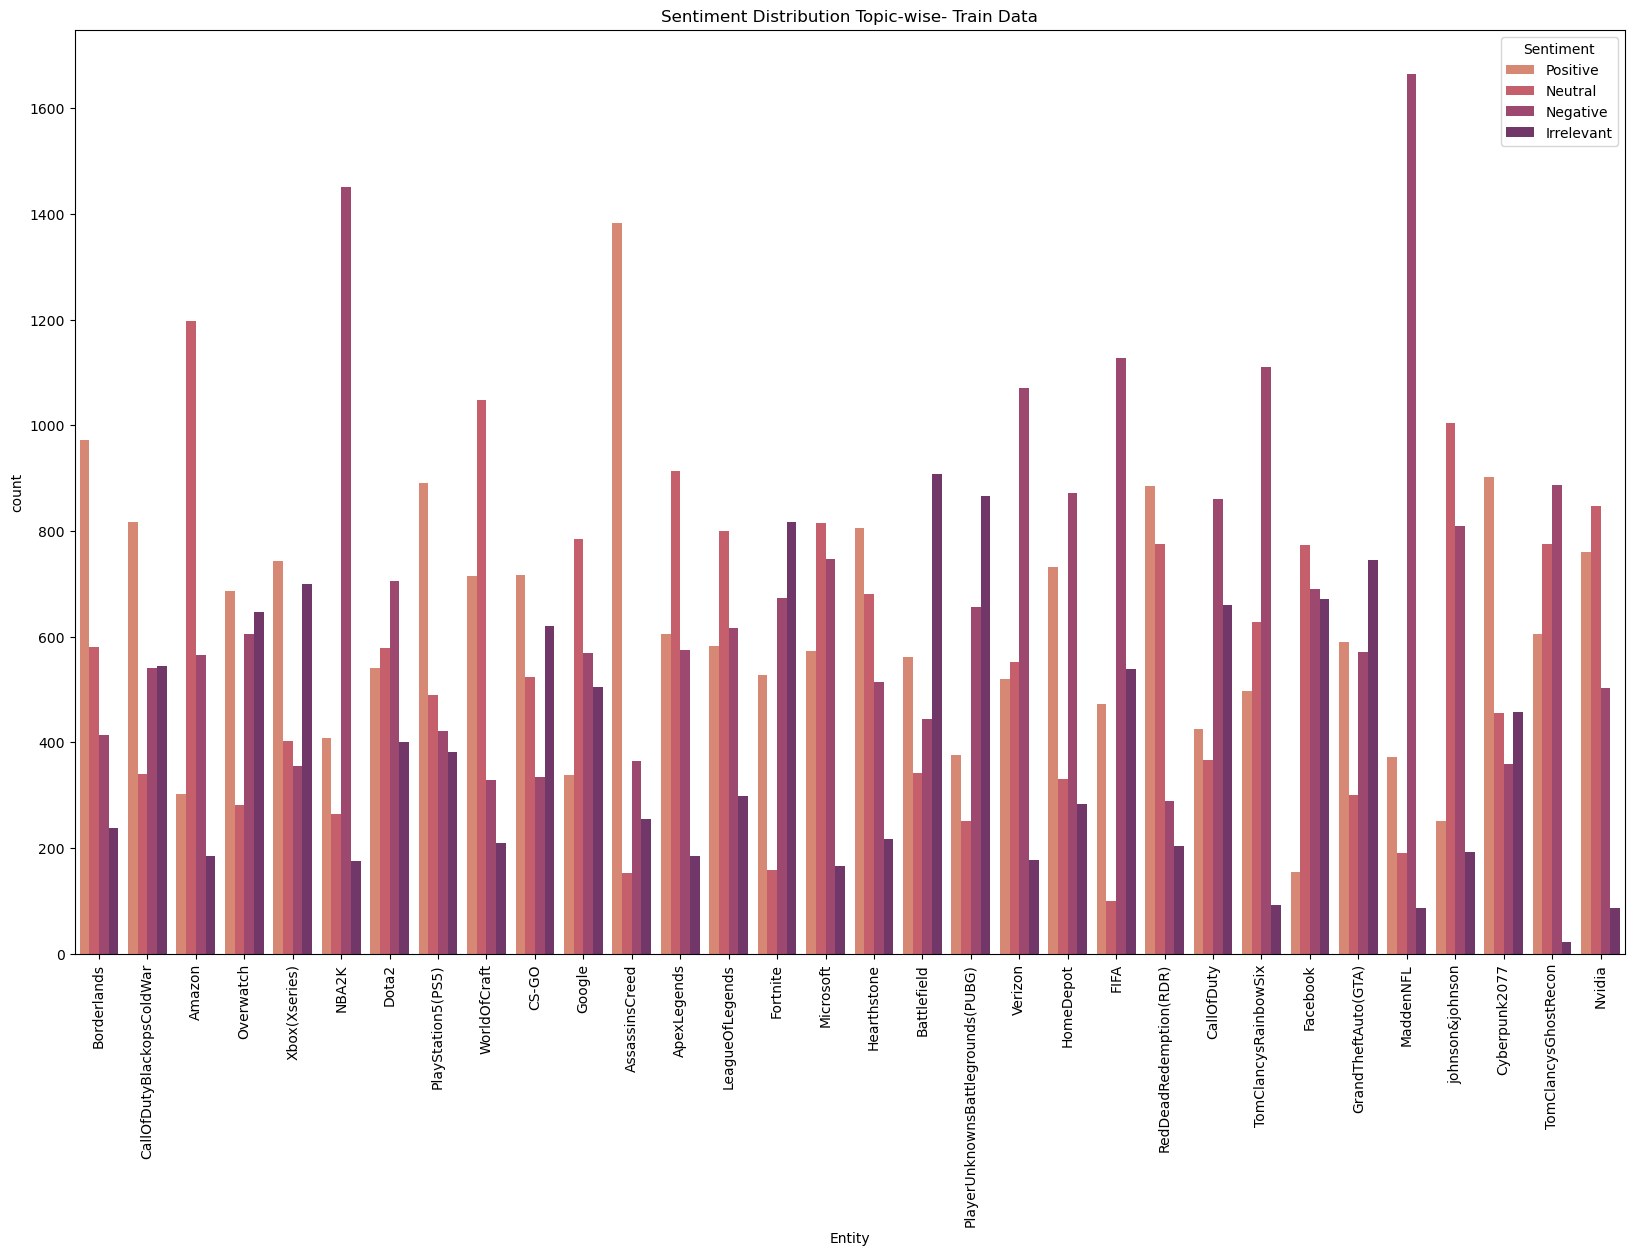

In [37]:
plt.figure(figsize=(20,12))
plt.title('Sentiment Distribution Topic-wise- Train Data')
sns.countplot(x='Entity', data= train, palette= 'flare', hue= 'Sentiment')
plt.xticks(rotation=90)
plt.show()

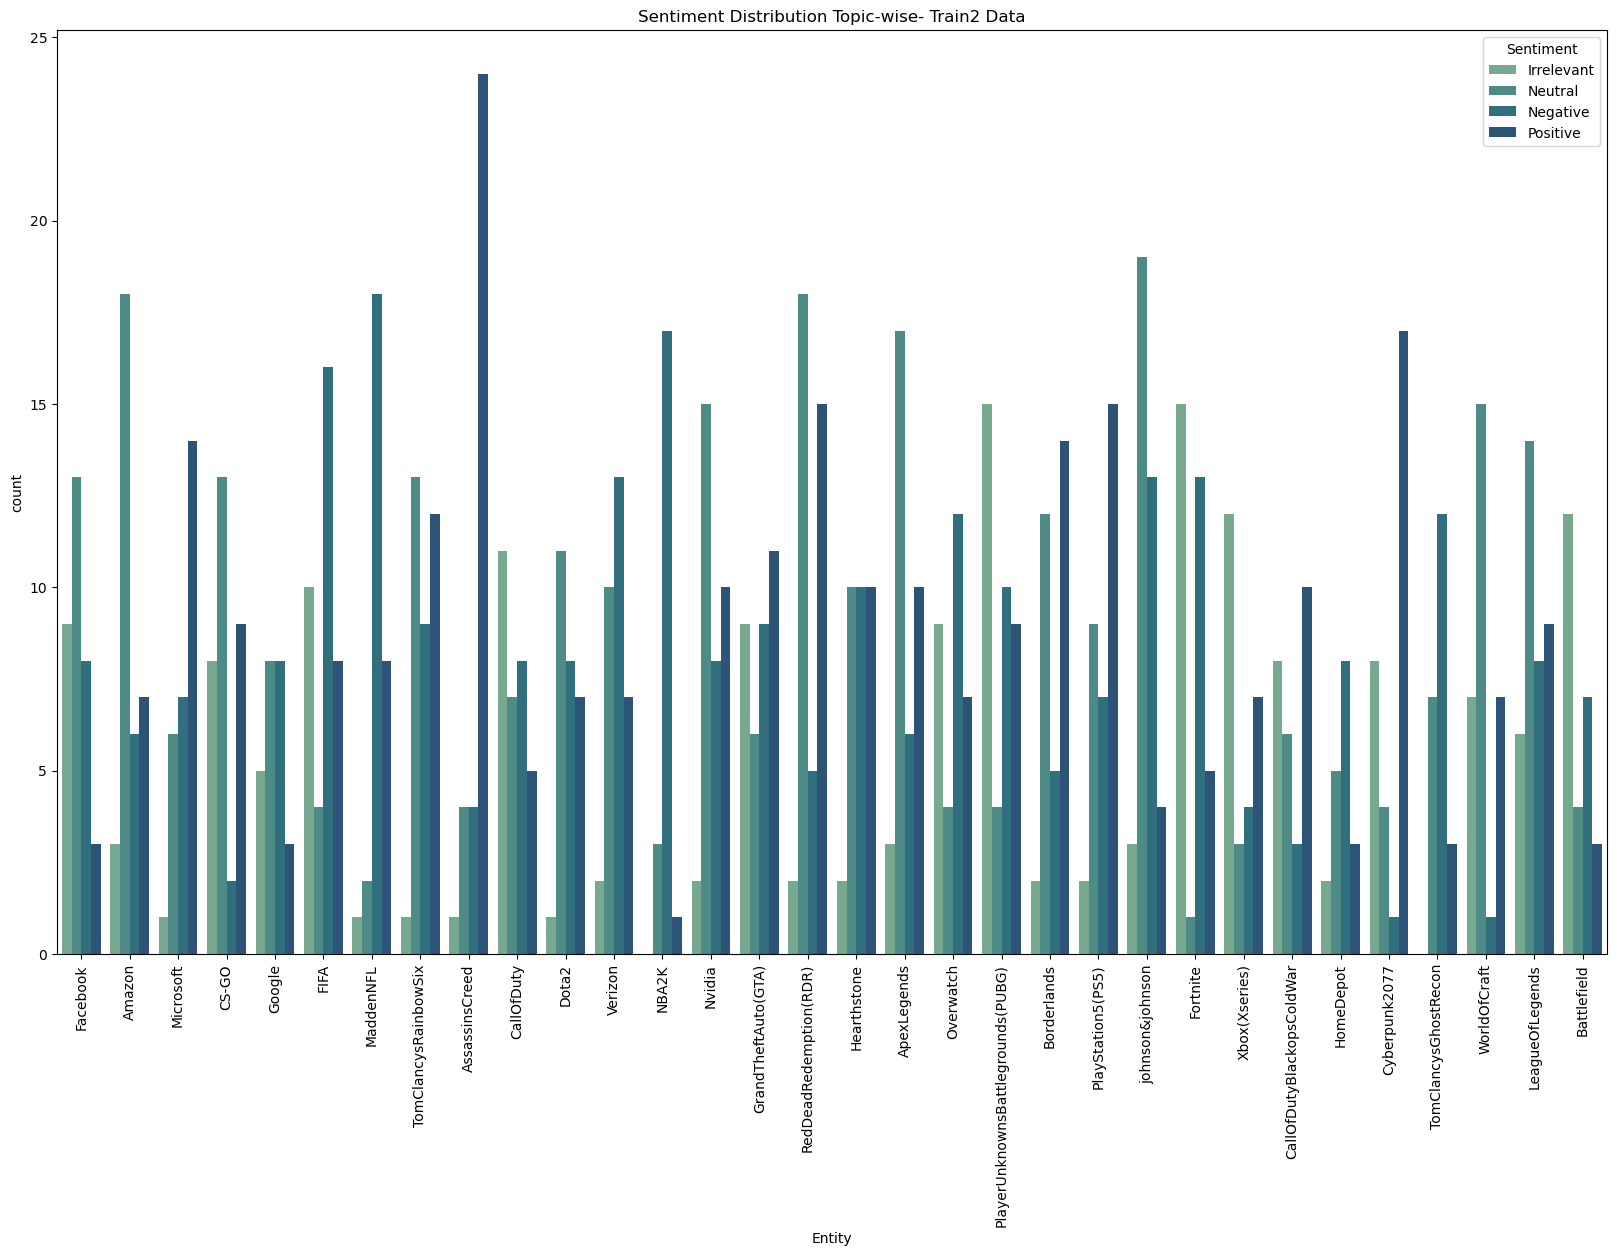

In [38]:
plt.figure(figsize=(20,12))
plt.title('Sentiment Distribution Topic-wise- Train2 Data')
sns.countplot(x='Entity', data= train2, palette= 'crest', hue= 'Sentiment')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')
# Step 2: Select Top 5 Topics
topic_counts = train['Entity'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Entity'].isin(topic_counts)]

In [244]:
# Group by Topic and Sentiment
topic_wise_sentiment2 = train2.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')
# Step 2: Select Top 5 Topics
topic_counts2 = train2['Entity'].value_counts().nlargest(5).index
top_topics_sentiment2 = topic_wise_sentiment2[topic_wise_sentiment2['Entity'].isin(topic_counts2)]

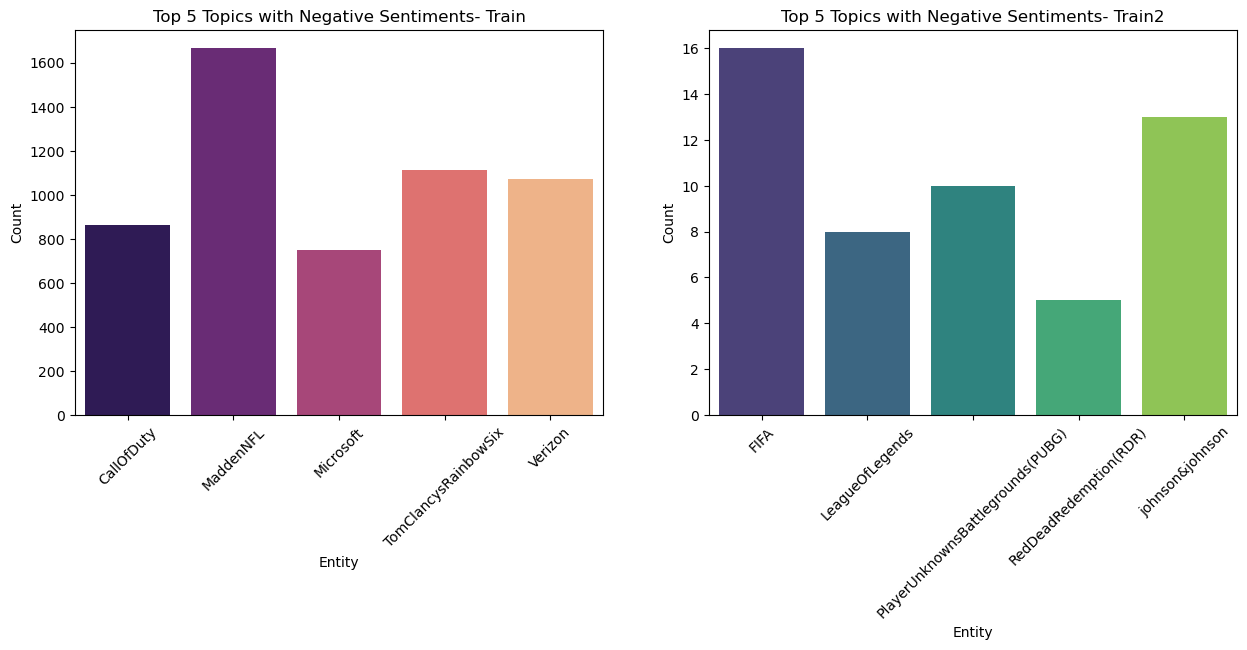

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Entity', y='Count', palette='magma', ax= ax[0])
ax[0].set_title('Top 5 Topics with Negative Sentiments- Train')
ax[0].set_xlabel('Entity')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', labelrotation=45)

sns.barplot(data=top_topics_sentiment2[top_topics_sentiment2['Sentiment'] == 'Negative'], x='Entity', y='Count', palette='viridis', ax= ax[1])
ax[1].set_title('Top 5 Topics with Negative Sentiments- Train2')
ax[1].set_xlabel('Entity')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

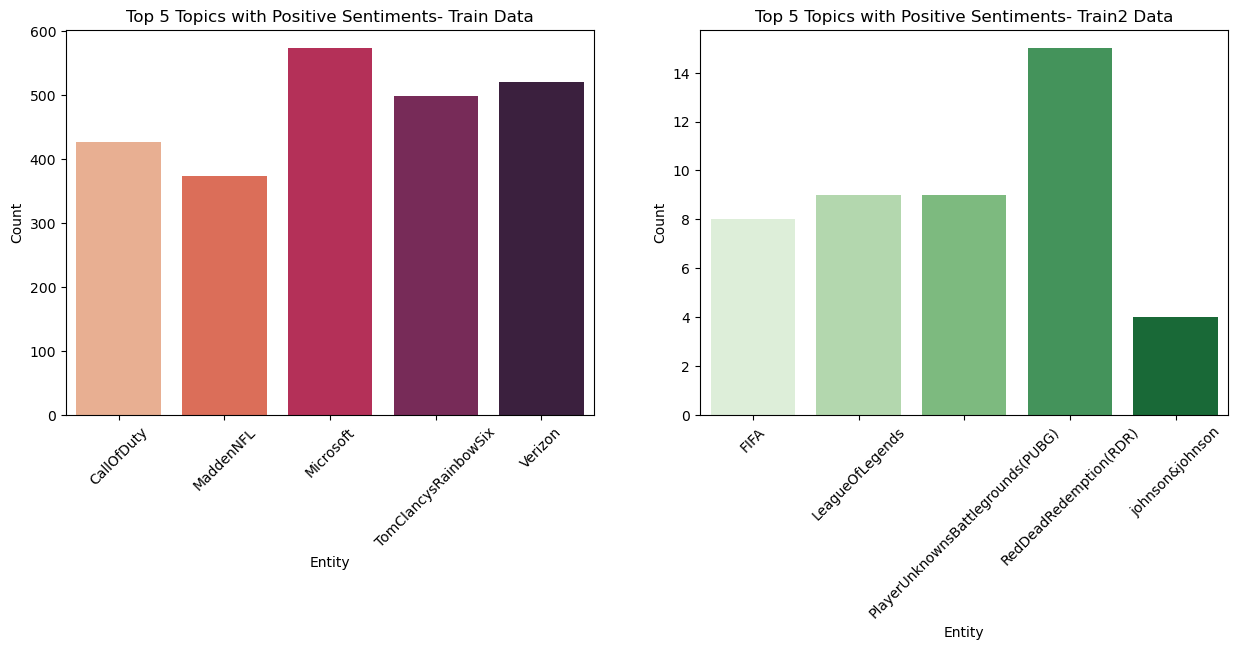

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Entity', y='Count', palette='rocket_r', ax= ax[0])
ax[0].set_title('Top 5 Topics with Positive Sentiments- Train Data')
ax[0].set_xlabel('Entity')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', labelrotation=45)

sns.barplot(data=top_topics_sentiment2[top_topics_sentiment2['Sentiment'] == 'Positive'], x='Entity', y='Count', palette='Greens', ax= ax[1])
ax[1].set_title('Top 5 Topics with Positive Sentiments- Train2 Data')
ax[1].set_xlabel('Entity')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

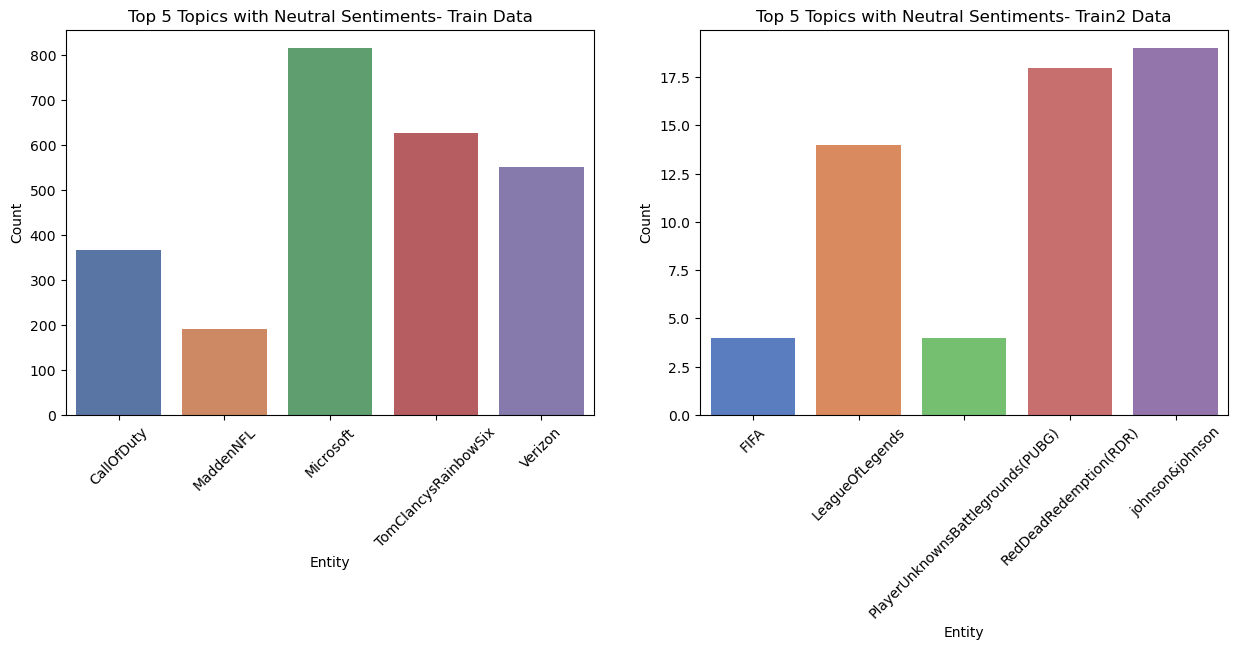

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Entity', y='Count', palette='deep', ax= ax[0])
ax[0].set_title('Top 5 Topics with Neutral Sentiments- Train Data')
ax[0].set_xlabel('Entity')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', labelrotation=45)

sns.barplot(data=top_topics_sentiment2[top_topics_sentiment2['Sentiment'] == 'Neutral'], x='Entity', y='Count', palette='muted', ax= ax[1])
ax[1].set_title('Top 5 Topics with Neutral Sentiments- Train2 Data')
ax[1].set_xlabel('Entity')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

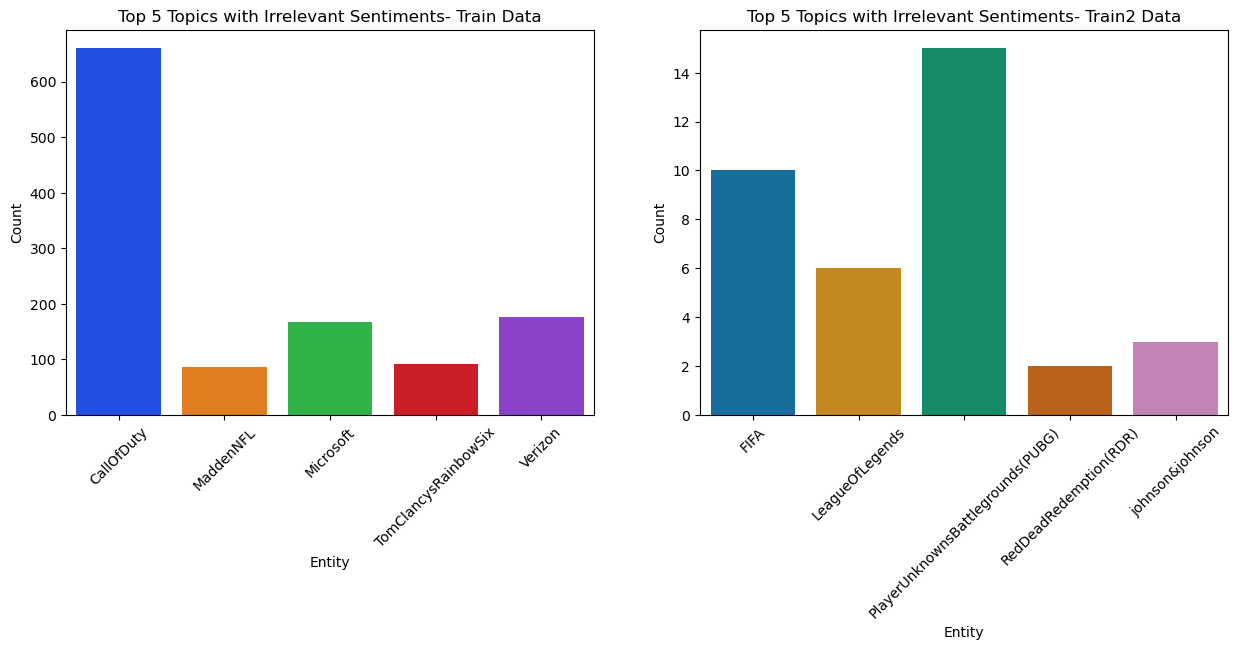

In [249]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Entity', y='Count', palette='bright', ax= ax[0])
ax[0].set_title('Top 5 Topics with Irrelevant Sentiments- Train Data')
ax[0].set_xlabel('Entity')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', labelrotation=45)

sns.barplot(data=top_topics_sentiment2[top_topics_sentiment2['Sentiment'] == 'Irrelevant'], x='Entity', y='Count', palette='colorblind', ax= ax[1])
ax[1].set_title('Top 5 Topics with Irrelevant Sentiments- Train2 Data')
ax[1].set_xlabel('Entity')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

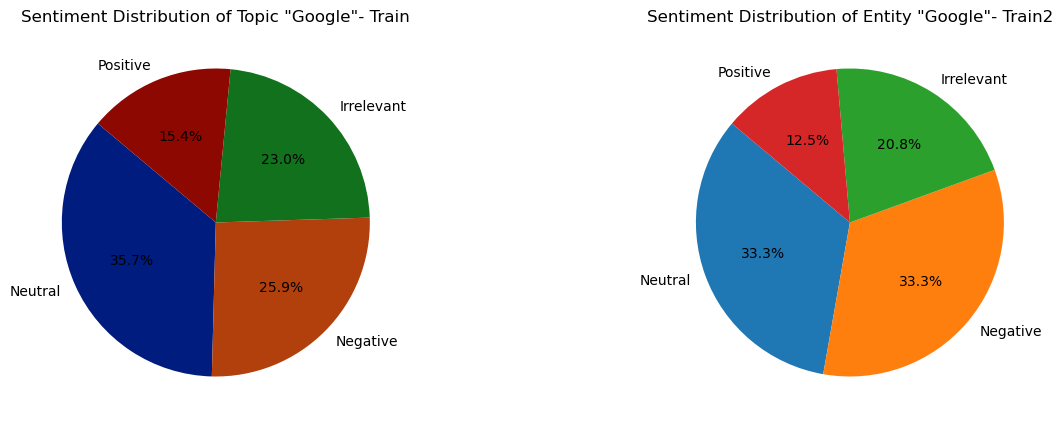

In [250]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Entity'] == 'Google']
# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()
ax[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors= sns.color_palette("dark"))
ax[0].set_title('Sentiment Distribution of Topic "Google"- Train')

google_data2 = train2[train2['Entity'] == 'Google']
sentiment_counts2 = google_data2['Sentiment'].value_counts()
ax[1].pie(sentiment_counts2, labels=sentiment_counts2.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Sentiment Distribution of Entity "Google"- Train2')
plt.show()

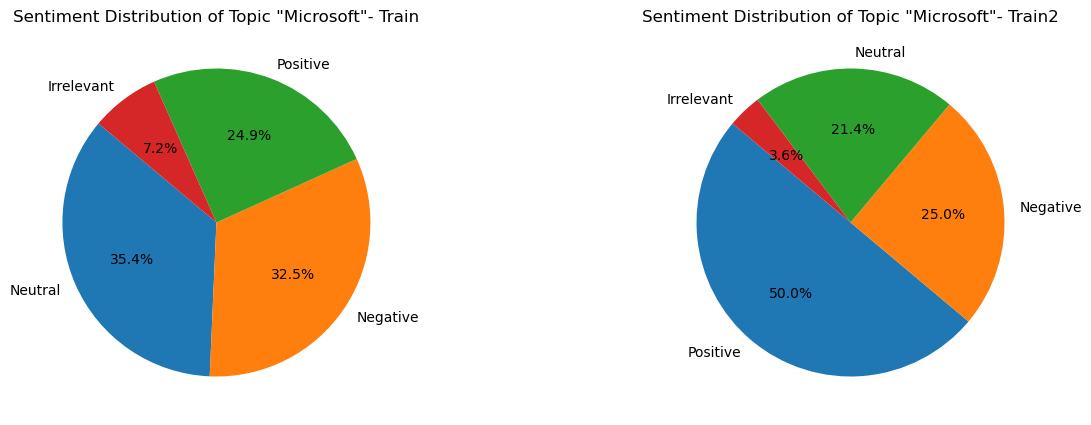

In [252]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Entity'] == 'Microsoft']
# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()
ax[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Sentiment Distribution of Topic "Microsoft"- Train')

ms_data2 = train2[train2['Entity'] == 'Microsoft']
sentiment_counts2 = ms_data2['Sentiment'].value_counts()
ax[1].pie(sentiment_counts2, labels=sentiment_counts2.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Sentiment Distribution of Topic "Microsoft"- Train2')
plt.show()

In [254]:
train['msg_len'] = train['Text'].apply(len)

In [255]:
train

,ID,Entity,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


In [256]:
train2['msg_len'] = train2['Text'].apply(len)

In [257]:
train2

,ID,Entity,Sentiment,Text,msg_len
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,242
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,109
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,91
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",71
4,4433,Google,Neutral,Now the President is slapping Americans in the...,170
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,281
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,248
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,120
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,49


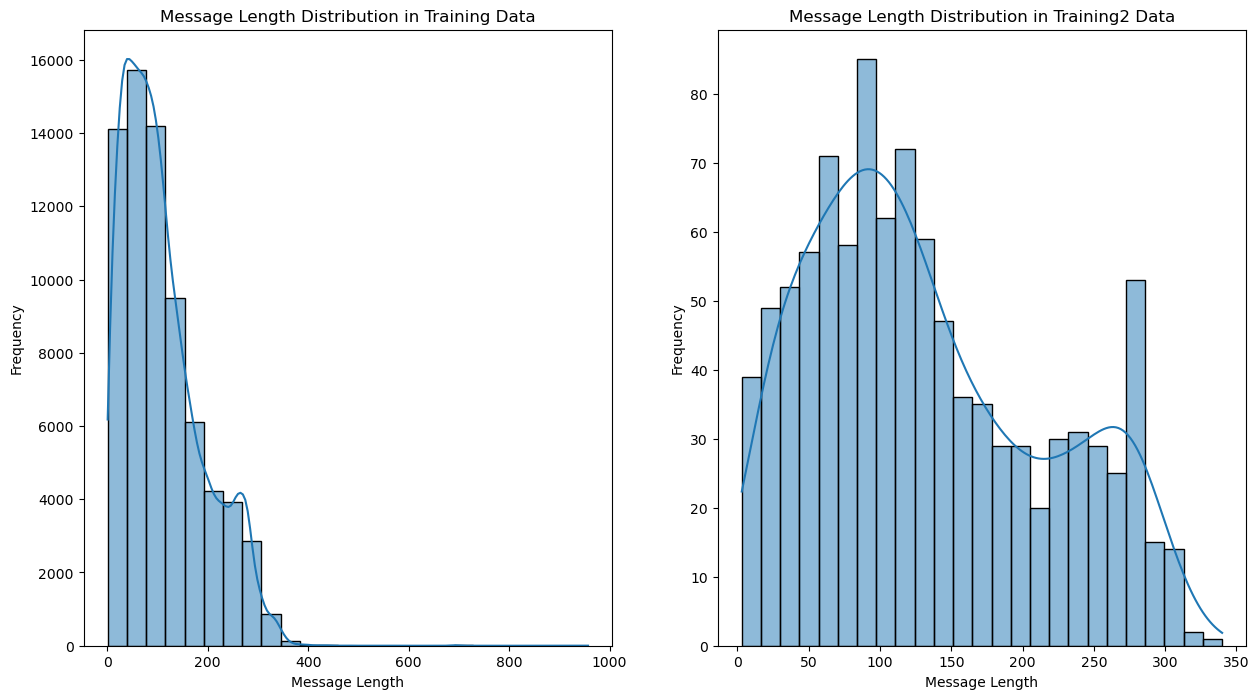

In [258]:
fig, ax = plt.subplots(1, 2, figsize= (15,8))
sns.histplot(train['msg_len'], bins= 25, kde= True, ax= ax[0])
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

sns.histplot(train2['msg_len'], bins= 25, kde= True, ax= ax[1])
ax[1].set_title('Message Length Distribution in Training2 Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')
plt.show()

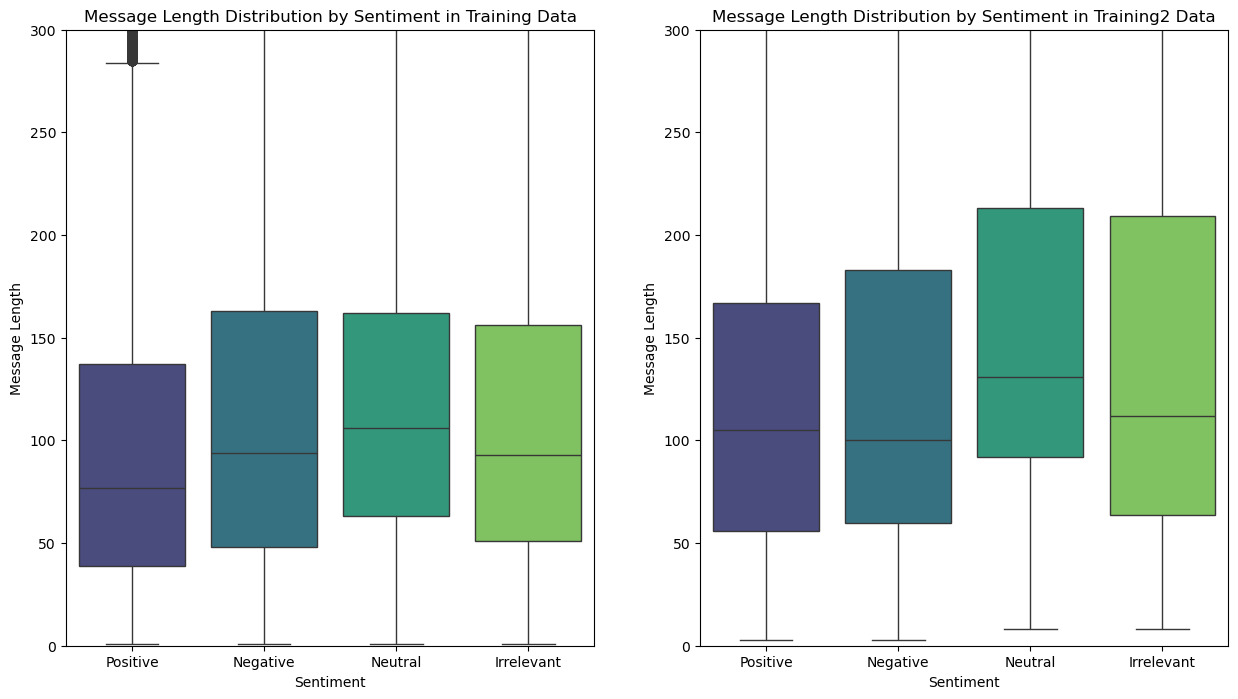

In [259]:
fig, ax = plt.subplots(1, 2, figsize= (15,8))
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax= ax[0])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0,300)

sns.boxplot(data=train2, x=train2['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax= ax[1])
ax[1].set_title('Message Length Distribution by Sentiment in Training2 Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0,300)
plt.show()

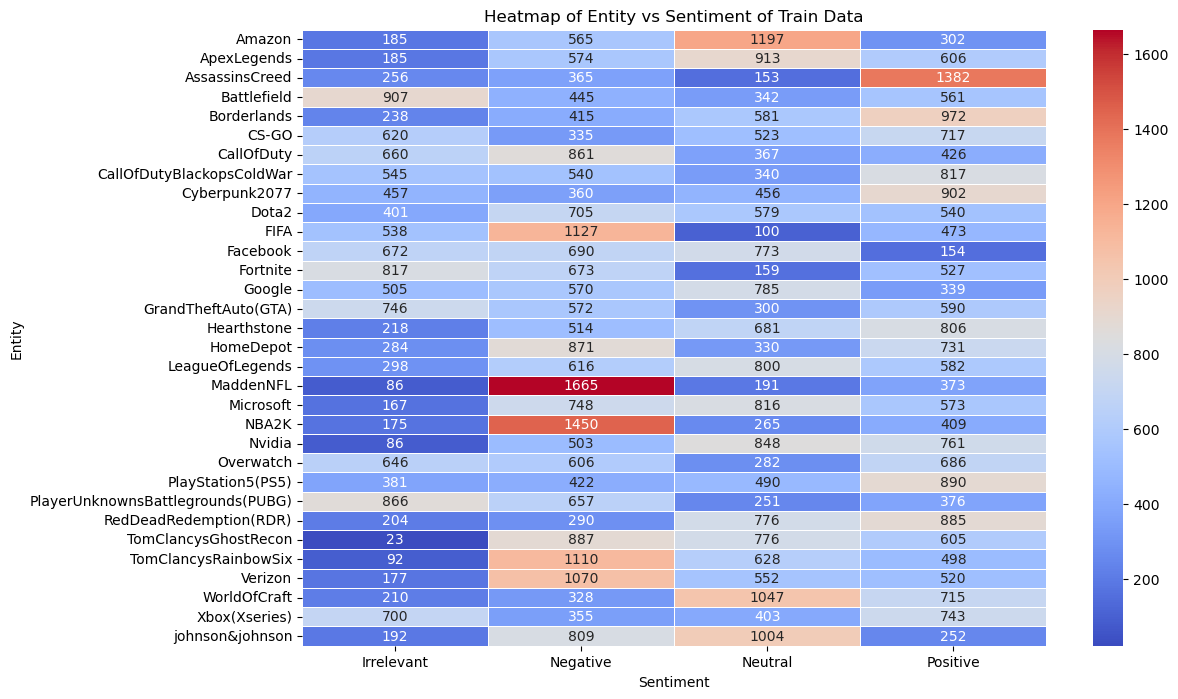

In [260]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Entity'], columns=train['Sentiment'])
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Entity vs Sentiment of Train Data')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

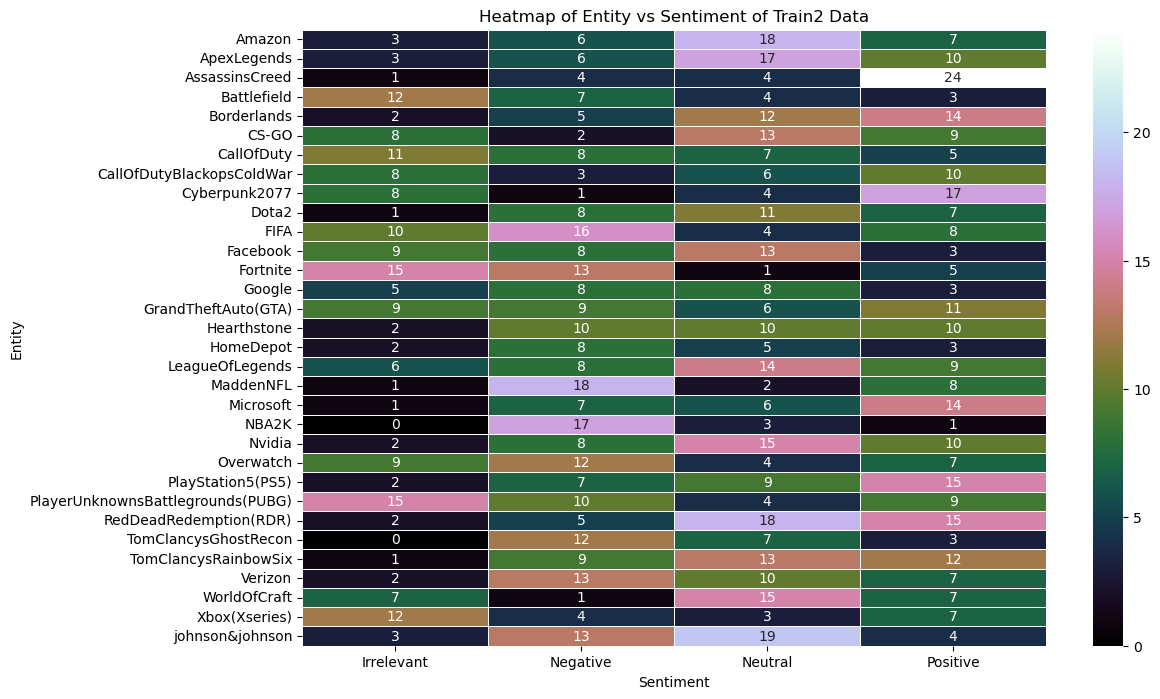

In [261]:
# Create the crosstab
crosstab = pd.crosstab(index=train2['Entity'], columns=train2['Sentiment'])
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='cubehelix', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Entity vs Sentiment of Train2 Data')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

# End of Project